In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from copy import deepcopy

### Dataset description

* __class__ : >50K, <=50K.
* __age__ : continuous.
* __workclass__ : Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never* -worked.
* __fnlwgt__ : continuous.
* __education__ : Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* __education-num__ : continuous.
* __marital-status__ : Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* __occupation__ : Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* __relationship__ : Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* __race__ : White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* __sex__ : Female, Male.
* __capital-gain__ : continuous.
* __capital-loss__ : continuous.
* __hours-per-week__ : continuous.
* __native-country__ : United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [2]:
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", 
          "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "outcome"]

orig_data = pd.read_csv("datasets/adult/adult.data", names=columns, index_col=False)
orig_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,outcome
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Age distribution

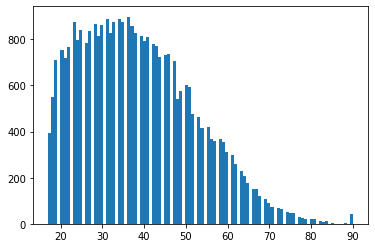

In [3]:
age = orig_data['age']
plt.hist(age, bins=100)
plt.show()

### Fnlwgt distribution

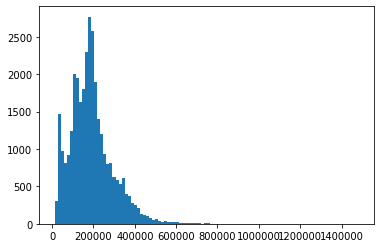

In [4]:
fnlwgt = orig_data['fnlwgt']
plt.hist(fnlwgt, bins=100)
plt.show()

### Education-num distribution

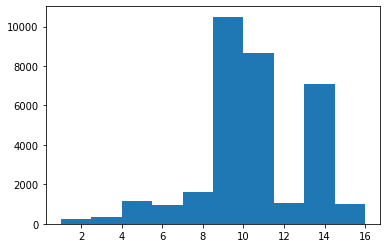

In [5]:
education_num = orig_data['education-num']
plt.hist(education_num)
plt.show()

### Capital-gain distribution

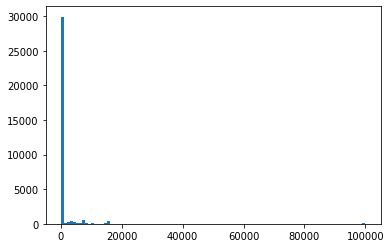

In [6]:
capital_gain = orig_data['capital-gain']
plt.hist(capital_gain, bins=100)
plt.show()

### Capital-loss distribution

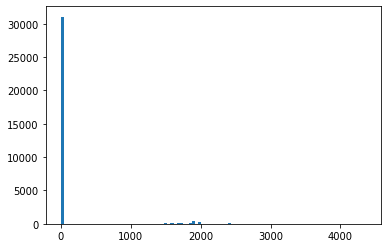

In [7]:
capital_loss = orig_data['capital-loss']
plt.hist(capital_loss, bins=100)
plt.show()

### Hours-per-week distribution

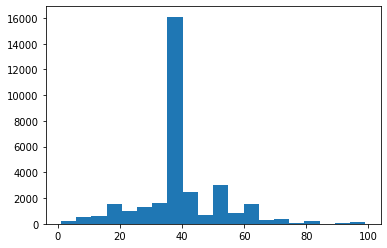

In [8]:
hours_per_week = orig_data['hours-per-week'] 
plt.hist(hours_per_week, bins=20)
plt.show()

### Discretize continous data in quantiles

In [9]:
data = orig_data.copy()
cont_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


kbins = {}

for col in cont_columns:
    kbin = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
    data[col] = kbin.fit_transform(data[col].to_numpy().reshape(-1, 1)).astype(int)
    kbins[col] = kbin
    
    # add intervals for readability
    lower_limit = kbins[col].bin_edges_[0][data[col]]
    upper_limit = kbins[col].bin_edges_[0][data[col] + 1]

    lower_limit = [str(int(x)) for x in lower_limit]
    upper_limit = [str(int(x)) for x in upper_limit]
    limits = np.array([lower_limit[i] + '-' + upper_limit[i] for i in range(len(upper_limit))]).reshape(-1, 1)
    data[col] = limits

data.to_csv("datasets/adult/dadult.data", index=False)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,outcome
0,31-46,State-gov,12285-306769,Bachelors,13-16,Never-married,Adm-clerical,Not-in-family,White,Male,0-19999,0-871,20-40,United-States,<=50K
1,46-60,Self-emp-not-inc,12285-306769,Bachelors,13-16,Married-civ-spouse,Exec-managerial,Husband,White,Male,0-19999,0-871,1-20,United-States,<=50K
2,31-46,Private,12285-306769,HS-grad,7-10,Divorced,Handlers-cleaners,Not-in-family,White,Male,0-19999,0-871,20-40,United-States,<=50K
3,46-60,Private,12285-306769,11th,7-10,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0-19999,0-871,20-40,United-States,<=50K
4,17-31,Private,306769-601253,Bachelors,13-16,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0-19999,0-871,20-40,Cuba,<=50K


### One hot encodings

In [10]:
encoded_columns = deepcopy(columns)
encoded_columns.remove('outcome')

oh_data = pd.get_dummies(data, prefix=encoded_columns, columns=encoded_columns)
oh_data.to_csv("datasets/adult/ohdadult.data", index=False)
oh_data.head()

,outcome,age_17-31,age_31-46,age_46-60,age_60-75,age_75-90,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,<=50K,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,<=50K,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,<=50K,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,<=50K,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,<=50K,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
